In [33]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# SHAP
import shap

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [34]:
# Update this path if needed
df = pd.read_csv(r"C:\Users\vaish\Downloads\dataset_raw _HR_Analytics.csv")

print("✅ Dataset loaded successfully!")
print(df.shape)
df.head()


✅ Dataset loaded successfully!
(1480, 38)


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

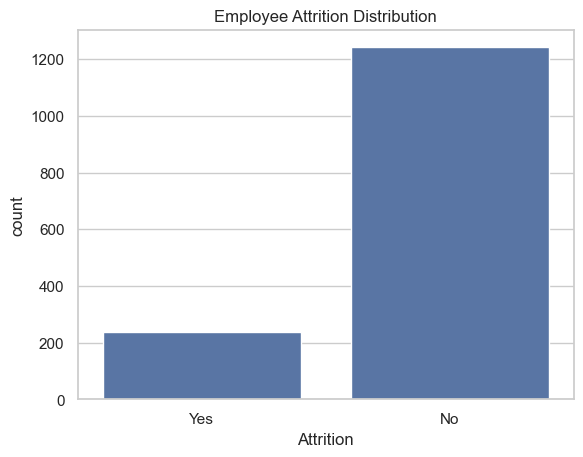

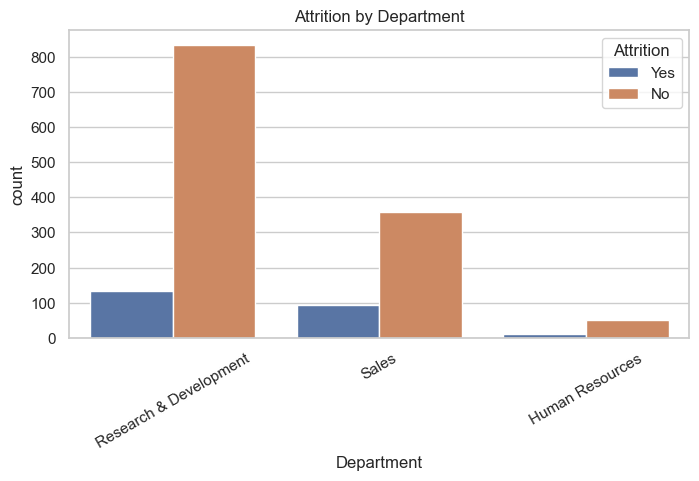

In [35]:
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# Attrition counts
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Distribution")
plt.show()

# Department-wise attrition
plt.figure(figsize=(8,4))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=30)
plt.show()


In [36]:
target = 'Attrition'  # or whatever your target column is named
X = df.drop(columns=[target])
y = df[target].apply(lambda x: 1 if x == 'Yes' else 0)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [38]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print(f"Numeric cols: {len(num_cols)}, Categorical cols: {len(cat_cols)}")

# Pipelines
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


Numeric cols: 26, Categorical cols: 11


In [39]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("✅ Data transformed successfully!")


✅ Data transformed successfully!


Accuracy: 0.8198198198198198

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90       373
           1       0.41      0.30      0.34        71

    accuracy                           0.82       444
   macro avg       0.64      0.61      0.62       444
weighted avg       0.80      0.82      0.81       444



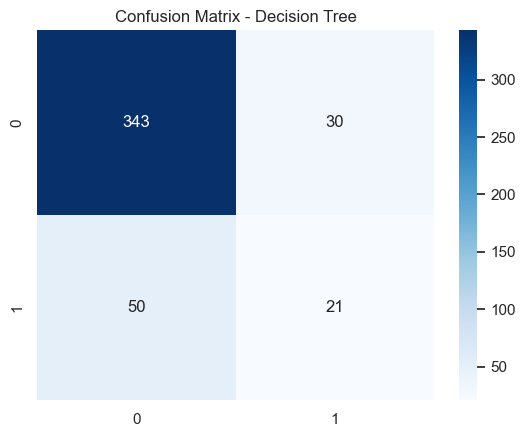

In [40]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_processed, y_train)

y_pred_dt = dt.predict(X_test_processed)
y_prob_dt = dt.predict_proba(X_test_processed)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Running SHAP analysis (this may take a few minutes)...
✅ SHAP values shape after selection: (444, 1094)


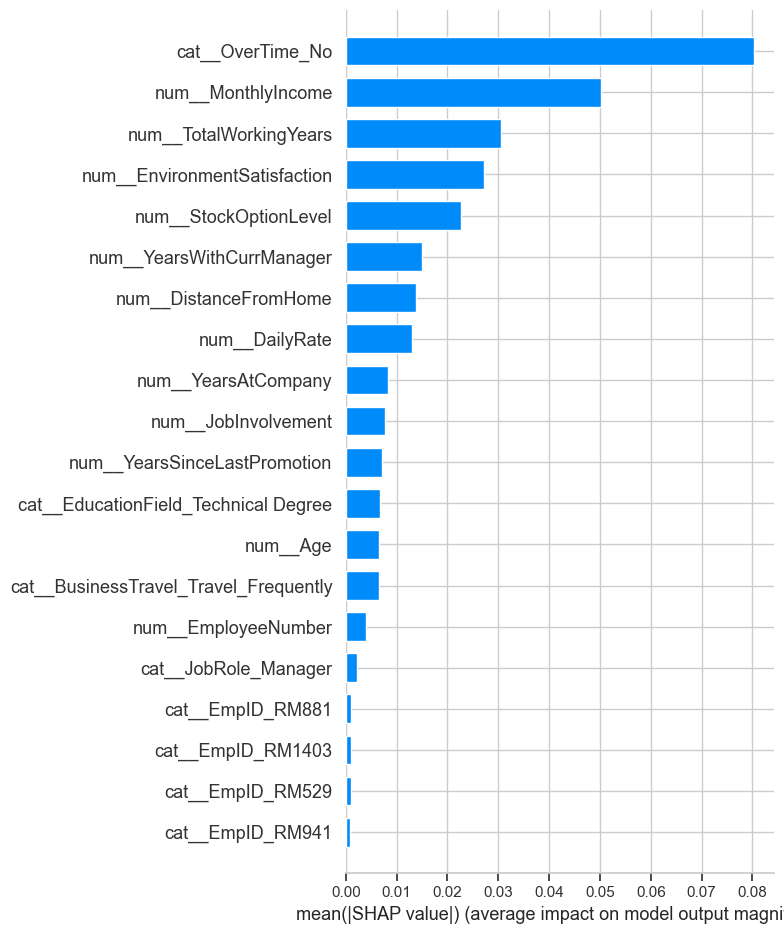

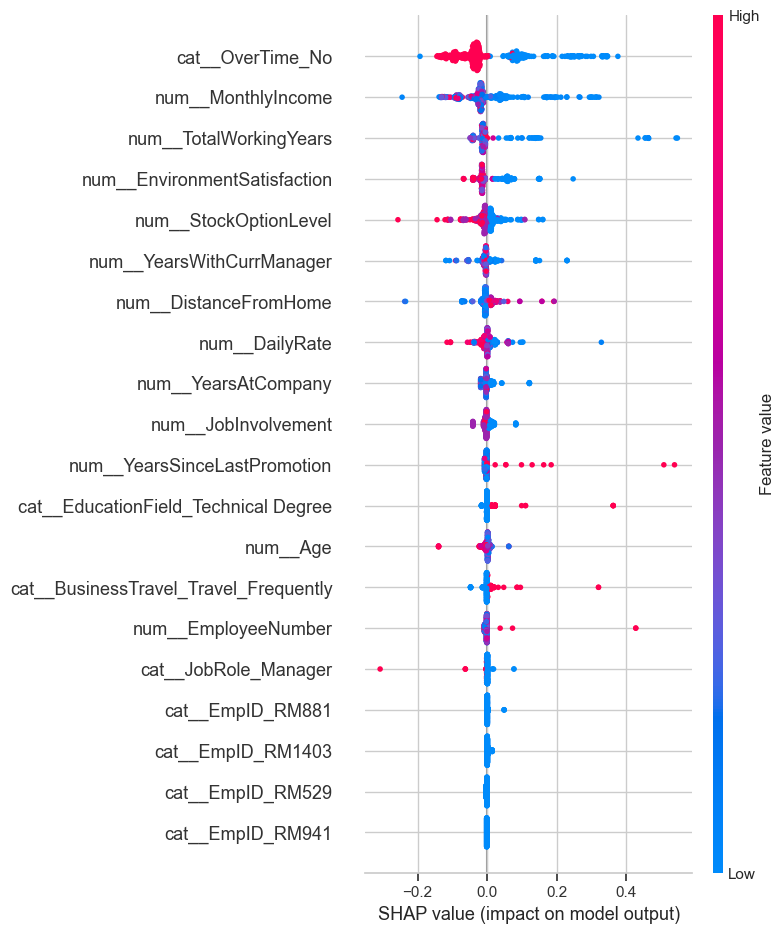

In [42]:
print("Running SHAP analysis (this may take a few minutes)...")

# Transform test data
X_test_transformed = X_test_processed
feature_names = preprocessor.get_feature_names_out()

# Create SHAP explainer
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test_transformed)

# --- FIX HERE ---
# If SHAP values have 3D shape (samples, features, 2 classes)
if isinstance(shap_values, list):
    shap_values_class = shap_values[1]  # class 1 → attrition = Yes
elif shap_values.ndim == 3:
    shap_values_class = shap_values[:, :, 1]  # select positive class
else:
    shap_values_class = shap_values

print("✅ SHAP values shape after selection:", shap_values_class.shape)

# ✅ SHAP DataFrame (2D now)
shap_df = pd.DataFrame(shap_values_class, columns=feature_names)
shap_df['pred_prob_dt'] = y_prob_dt[:, 1]

# --- Summary plots ---
shap.summary_plot(shap_values_class, X_test_transformed, feature_names=feature_names, plot_type="bar")
shap.summary_plot(shap_values_class, X_test_transformed, feature_names=feature_names)



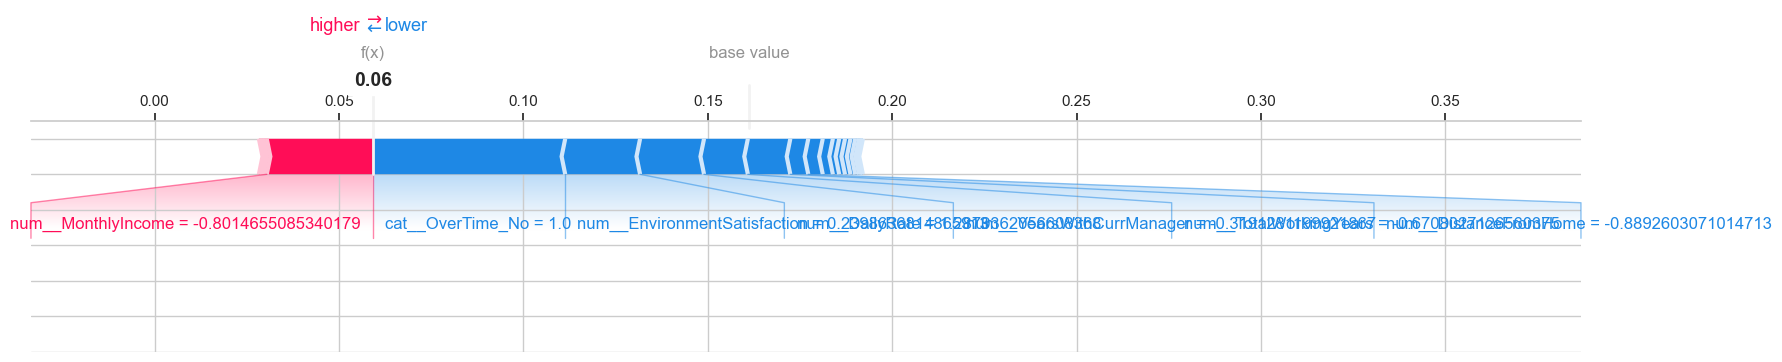

In [45]:
import shap
import numpy as np

# Initialize SHAP JS visualization
shap.initjs()

# Base value for the positive ("Yes") class if available
if isinstance(explainer.expected_value, list) or isinstance(explainer.expected_value, np.ndarray):
    base_value = explainer.expected_value[1]
else:
    base_value = explainer.expected_value

# Extract SHAP values for one sample and ensure correct shape
# shap_values_class has shape (n_samples, n_features, n_classes)
if shap_values_class.ndim == 3:
    shap_values_sample = shap_values_class[0, :, 1]  # employee 0, features :, class 1
else:
    shap_values_sample = shap_values_class[0]

# Prepare corresponding features
X_sample = np.array(X_test_transformed[0])

# ✅ Correct syntax for SHAP v0.20+
shap.plots.force(
    base_value=base_value,
    shap_values=shap_values_sample,
    features=X_sample,
    feature_names=feature_names,
    matplotlib=True
)


In [47]:
# 1️⃣ Export processed dataset for Power BI

# Combine test features and predicted probabilities
X_test_final = pd.DataFrame(X_test_transformed, columns=feature_names)
X_test_final['Actual'] = y_test.reset_index(drop=True)
X_test_final['Predicted'] = y_pred_dt
X_test_final['Prediction_Prob'] = y_prob_dt[:, 1]

# Save to CSV for Power BI
X_test_final.to_csv("powerbi_attrition_predictions.csv", index=False)
print("✅ Exported: powerbi_attrition_predictions.csv")


✅ Exported: powerbi_attrition_predictions.csv
